# Tutorial for the OpenCL implementation of GPU-SSA
### In this tutorial, we demonstrate the GPU-SSA solver for a non-GPU platform. For this, we are using models published on the Biomodels platform https://www.ebi.ac.uk/biomodels/. 
Prerequisites: 
- PySB with GPU-SSA Simulator
- OpenCL driver
- Model files BIOMD0000000008_url.xml and BIOMD0000000407_url.xml downloaded from the Biomodels platform

To compare the ODE solution with the SSA trajectories, we import the OpenCL- as well as the ScipyODE simulators nativ to PySB. With the native `model_from_sbml` importer, we can directly access `xml` model files in PySB.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pysb.simulator import OpenCLSSASimulator, ScipyOdeSimulator
from pysb.importers.sbml import model_from_sbml

The defined `run_sbml` function simulates the given `xml` model both with the deterministic ODE simulator, as well as the probabilistic SSA trajectories and plots the results together.

In [2]:
def run_sbml(model_num, tspan, n_sim=100):
    model = model_from_sbml(model_num, verbose=2)
    
    # create simulator and run simulations
    traj = OpenCLSSASimulator(model, 
                           precision=np.float64,
                           verbose=True).run(tspan, number_sim=n_sim)
    # adding ODE solution to plot
    y = ScipyOdeSimulator(model, tspan=tspan, compiler='cython').run()
    for i in model.observables:
        x = traj.dataframe[i.name].unstack(0).values
        plt.figure()
        plt.title(i.name)
        plt.plot(tspan, x, '0.5', lw=2, alpha=0.25)  # individual trajectories
        plt.plot(tspan, x.mean(1), 'k-*', lw=3, label="Mean")
        plt.plot(tspan, x.min(1), 'b--', lw=3, label="Minimum")
        plt.plot(tspan, x.max(1), 'r--', lw=3, label="Maximum")
        plt.plot(tspan, y.dataframe[i.name], 'g--', lw=3, label="ODE")
        plt.xlabel('Time')

We run the Goldbeter model for a cell cycle simulation https://doi.org/10.1073/pnas.95.24.14190.
The defined simulator identifies the platforms available on the computer. In this case, there is only a CPU available and therefore the choice has to be `0`.
The red line is the total maximum of the SSA trajectories, and the blue line the total minimum. The mean of the SSA simulations is depicted in black, while the deterministic solution of the ODE solver is shown in green.

2023-01-30 12:00:49.492 - pysb.importers.sbml - DEBUG - Performing SBML to BNGL translation in temporary directory /tmp/tmph7vxc0bo
2023-01-30 12:00:49.493 - pysb.importers.sbml - DEBUG - sbmlTranslator command: /home/martina/miniconda3/envs/mesi-env/bin/sbmlTranslator -i BIOMD0000000008_url.xml -o /tmp/tmph7vxc0bo/model.bngl
2023-01-30 12:00:50.772 - pysb - INFO - Logging started on PySB version 1.14.0
2023-01-30 12:00:50.773 - pysb - INFO - Log entry time offset from UTC: 1.00 hours
2023-01-30 12:00:50.796 - pysb.simulator.opencl_ssa - INFO - [model] Initialized OpenCLSSASimulator class
2023-01-30 12:00:50.797 - pysb.simulator.opencl_ssa - INFO - [model] Simulation(s) started
2023-01-30 12:00:50.801 - pysb.simulator.opencl_ssa - INFO - [model] Output OpenCl file to ssa_opencl_code.cl


Choose platform:
[0] <pyopencl.Platform 'Portable Computing Language' at 0x7fe35b2ea008>
Choice [0]:0


2023-01-30 12:00:52.399 - pysb.simulator.opencl_ssa - INFO - [model] Using device pthread-Intel(R) Core(TM) i9-7940X CPU @ 3.10GHz
2023-01-30 12:00:52.410 - pysb.simulator.opencl_ssa - INFO - [model] Creating content on device
2023-01-30 12:00:52.422 - pysb.simulator.opencl_ssa - INFO - [model] 100 simulations in 0.0105s


Set the environment variable PYOPENCL_CTX='0' to avoid being asked again.


2023-01-30 12:00:54.043 - pysb.simulator.scipyode - INFO - [model] Simulation(s) started
2023-01-30 12:00:54.081 - pysb.simulator.scipyode - INFO - [model] All simulation(s) complete


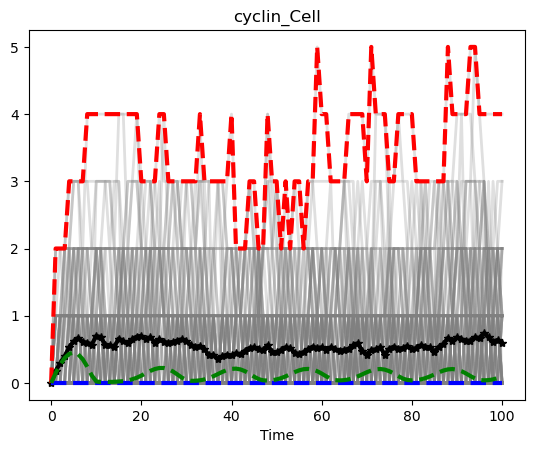

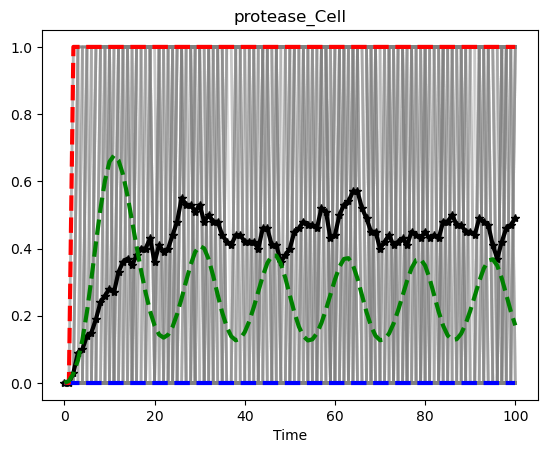

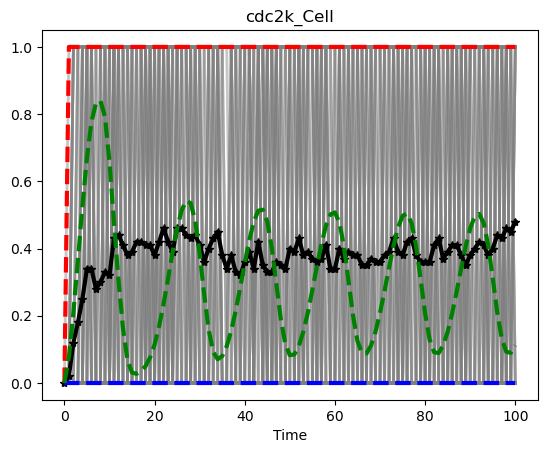

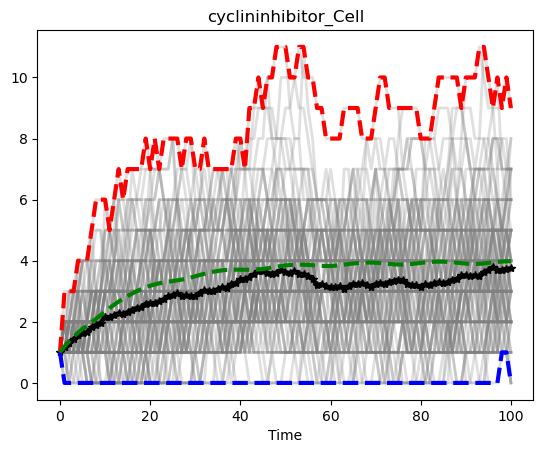

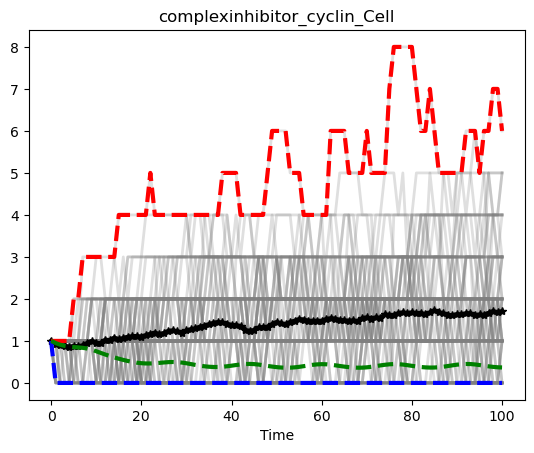

In [3]:
# BIOMD0000000008 works
run_sbml('BIOMD0000000008_url.xml', tspan=np.linspace(0, 100, 101))

In this example, we depict the trajectories of a model of the complex interplay of the crosstalk of `TNF-R1` induced pro- and anti-apoptotic signaling pathways. As above, the selected platform is `0`, i.e., CPUs of the computer.

2023-01-30 12:00:56.878 - pysb.importers.sbml - DEBUG - Performing SBML to BNGL translation in temporary directory /tmp/tmpqpwuigyo
2023-01-30 12:00:56.880 - pysb.importers.sbml - DEBUG - sbmlTranslator command: /home/martina/miniconda3/envs/mesi-env/bin/sbmlTranslator -i BIOMD0000000407_url.xml -o /tmp/tmpqpwuigyo/model.bngl
2023-01-30 12:00:58.100 - pysb.bng - INFO - [model] Generating reaction network
2023-01-30 12:00:58.588 - pysb - INFO - Logging started on PySB version 1.14.0
2023-01-30 12:00:58.588 - pysb - INFO - Log entry time offset from UTC: 1.00 hours
2023-01-30 12:00:58.654 - pysb.simulator.opencl_ssa - INFO - [model] Initialized OpenCLSSASimulator class
2023-01-30 12:00:58.655 - pysb.simulator.opencl_ssa - INFO - [model] Simulation(s) started
2023-01-30 12:00:58.711 - pysb.simulator.opencl_ssa - INFO - [model] Output OpenCl file to ssa_opencl_code.cl


Choose platform:
[0] <pyopencl.Platform 'Portable Computing Language' at 0x7fe35b2ea008>
Choice [0]:0


2023-01-30 12:00:59.990 - pysb.simulator.opencl_ssa - INFO - [model] Using device pthread-Intel(R) Core(TM) i9-7940X CPU @ 3.10GHz
2023-01-30 12:01:00.001 - pysb.simulator.opencl_ssa - INFO - [model] Creating content on device
2023-01-30 12:01:00.054 - pysb.simulator.opencl_ssa - INFO - [model] 100 simulations in 0.0512s


Set the environment variable PYOPENCL_CTX='0' to avoid being asked again.


2023-01-30 12:01:01.716 - pysb.simulator.scipyode - INFO - [model] Simulation(s) started
2023-01-30 12:01:01.789 - pysb.simulator.scipyode - INFO - [model] All simulation(s) complete


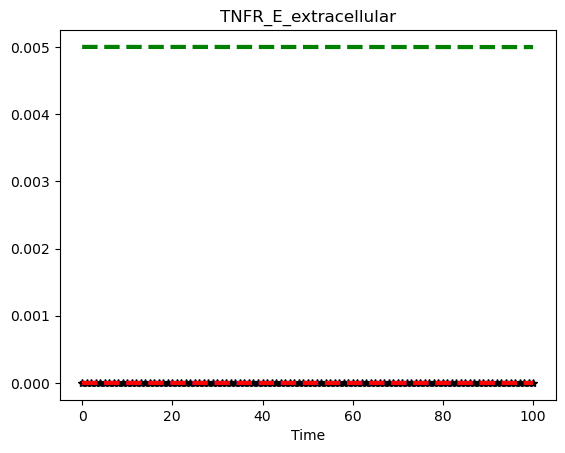

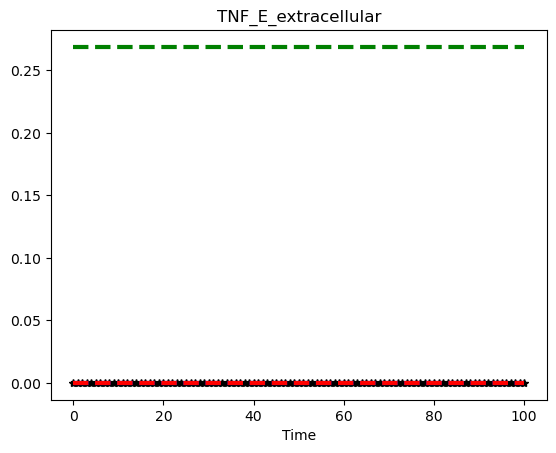

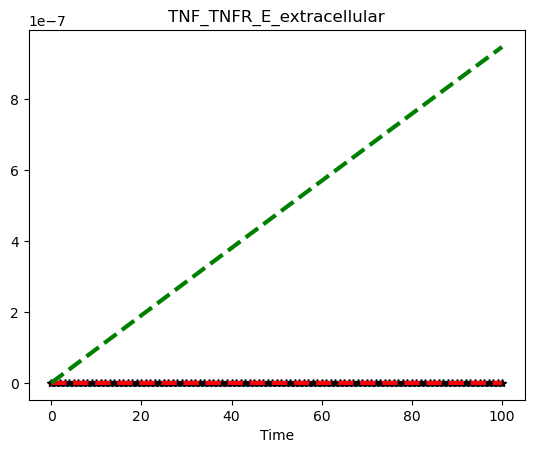

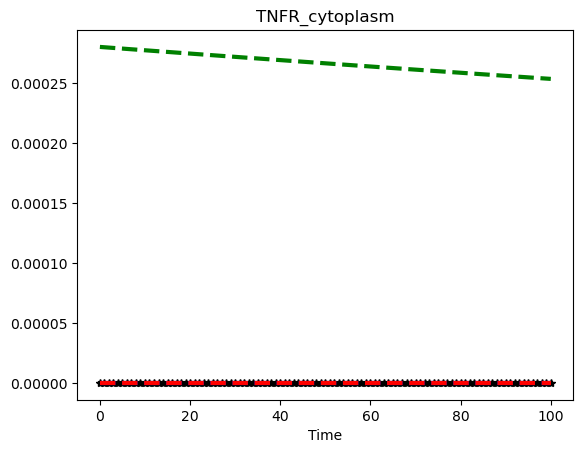

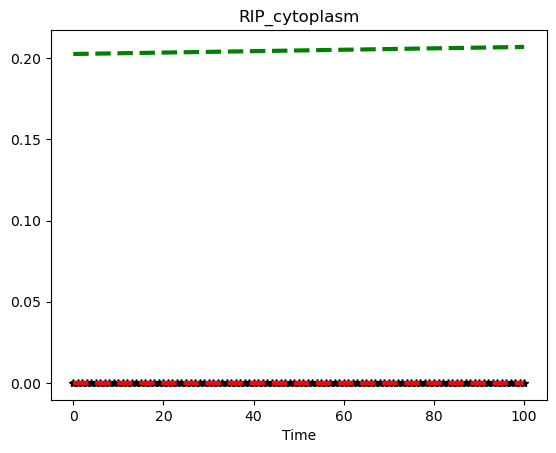

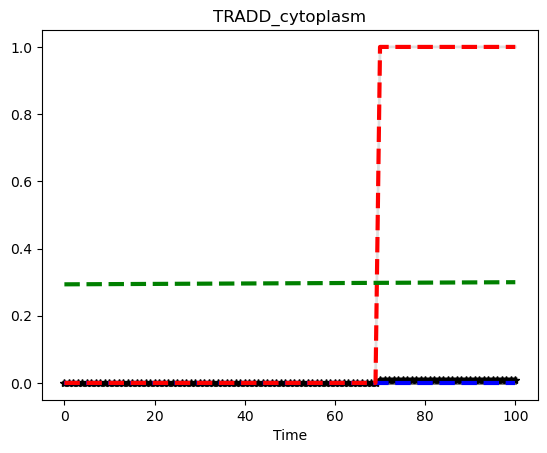

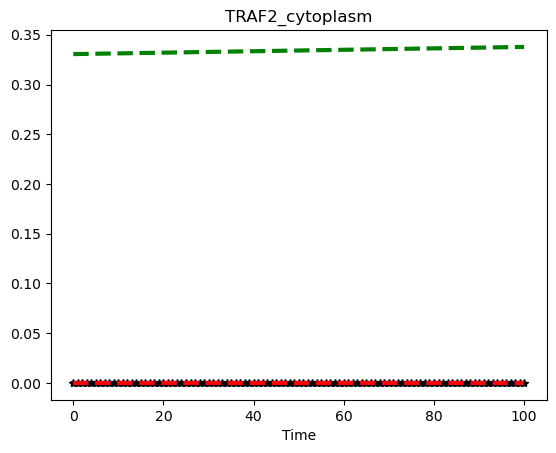

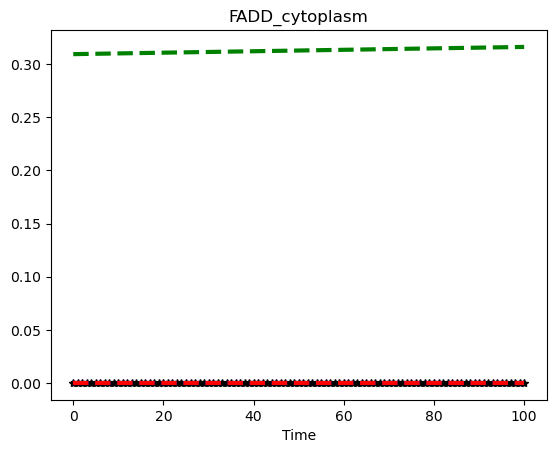

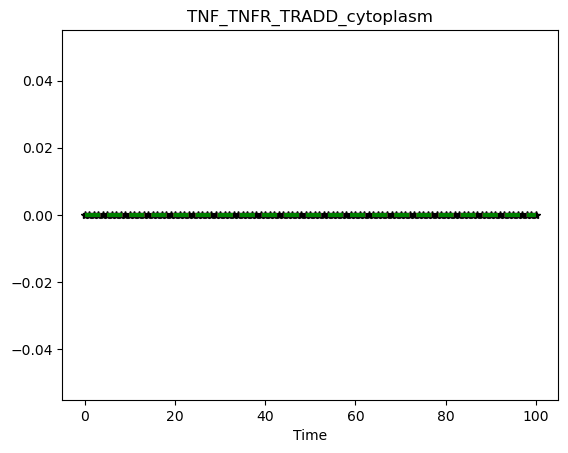

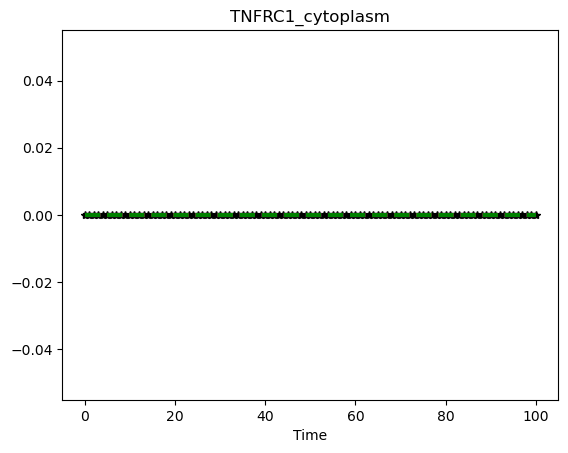

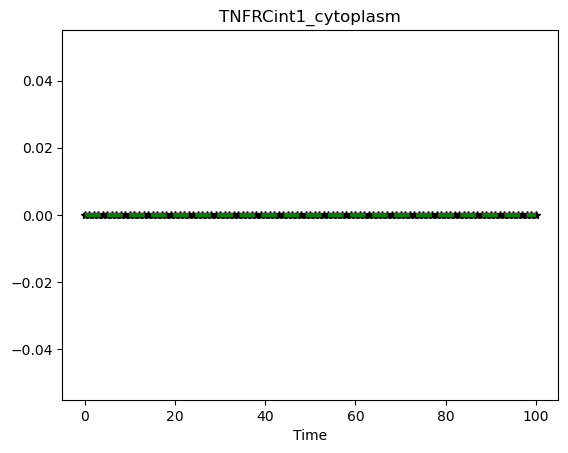

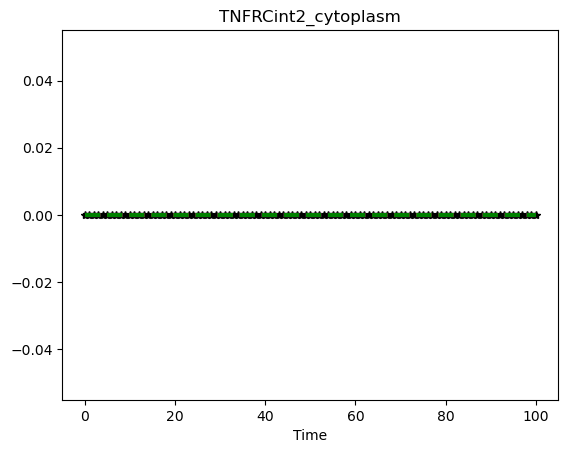

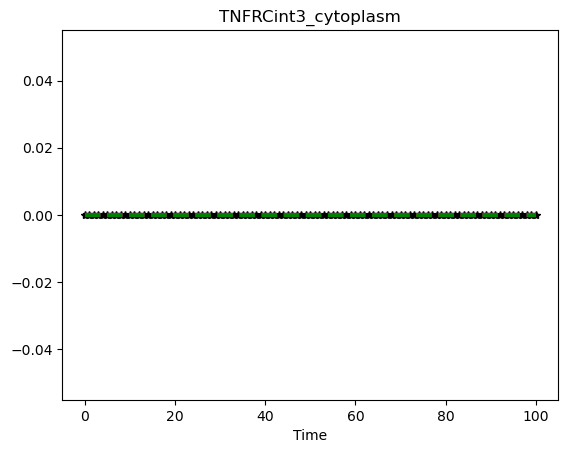

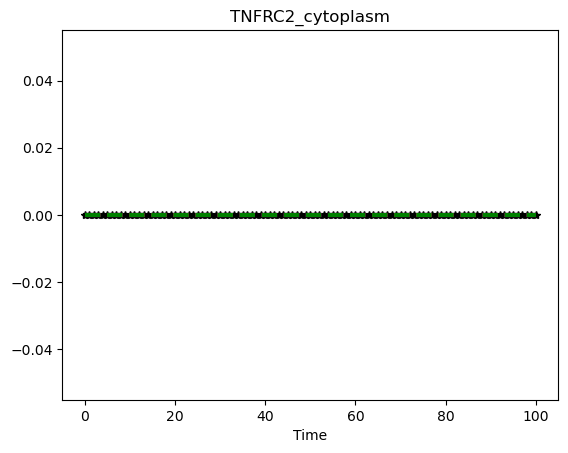

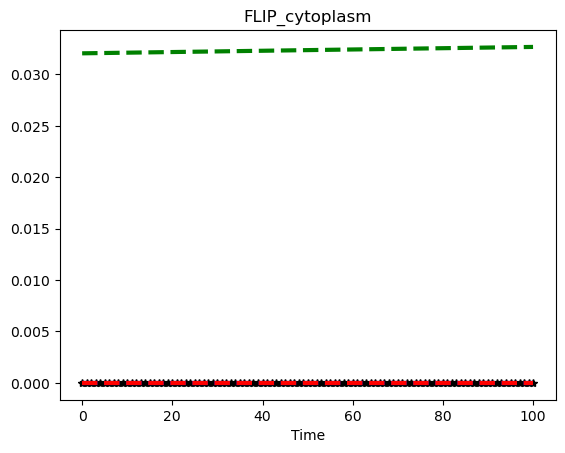

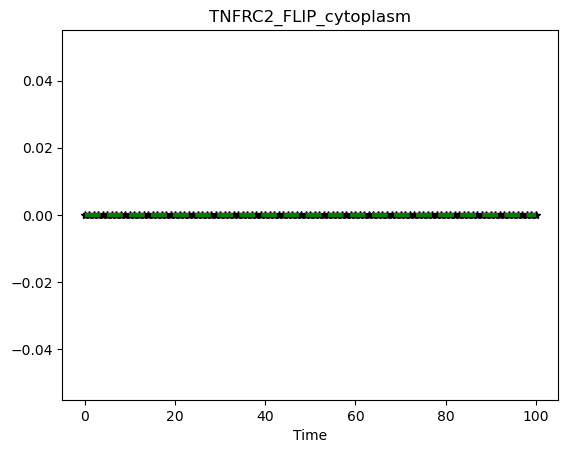

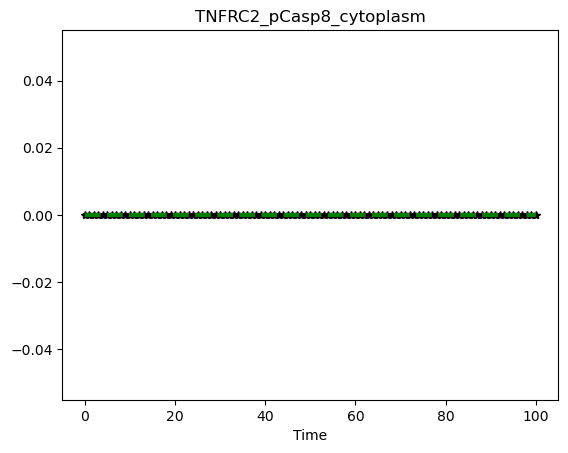

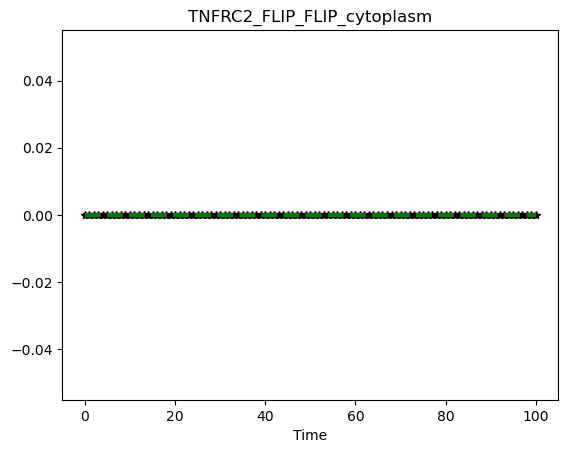

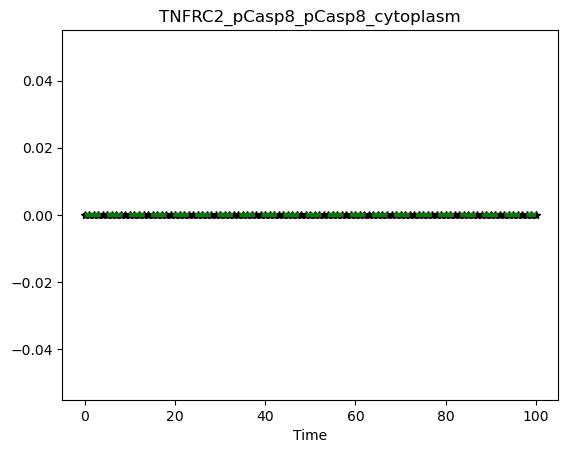

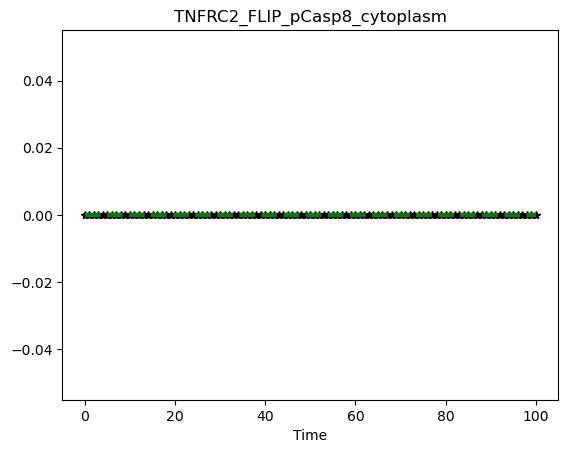

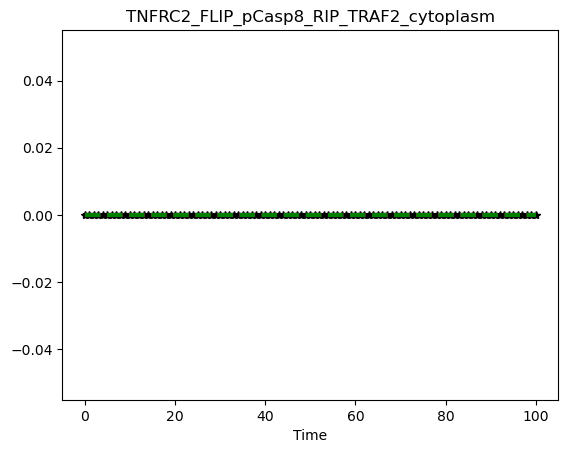

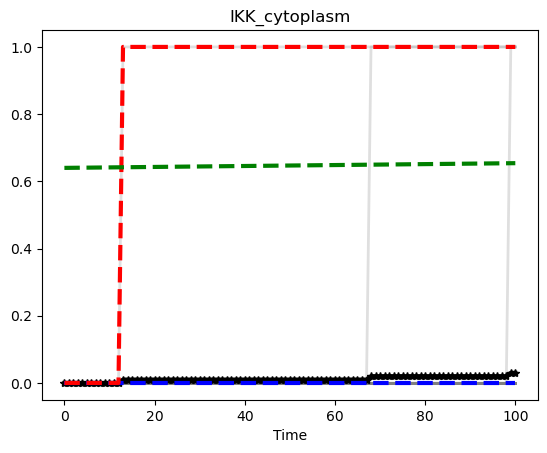

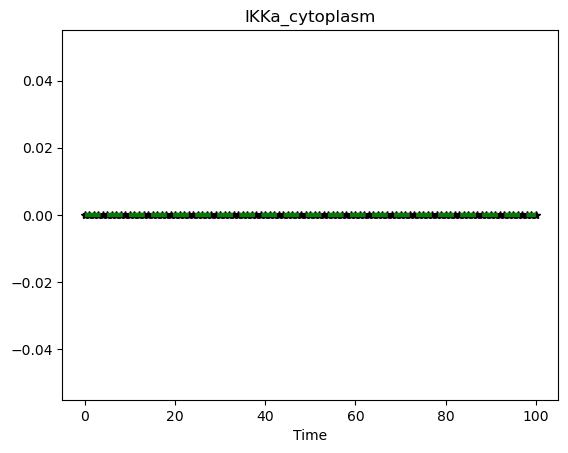

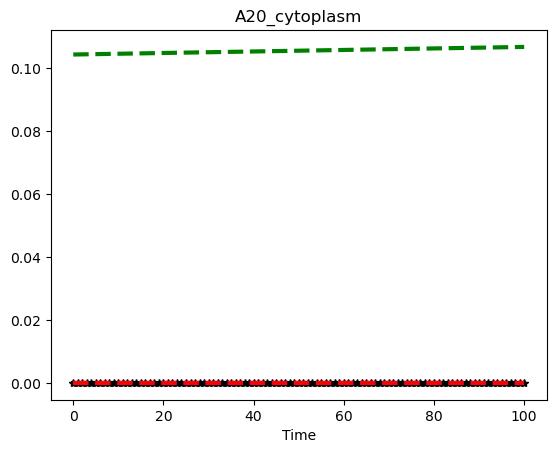

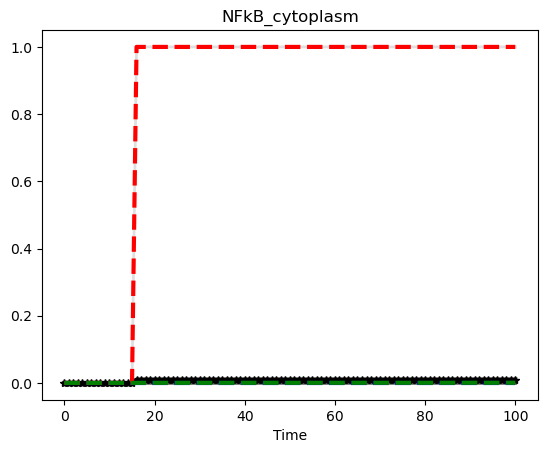

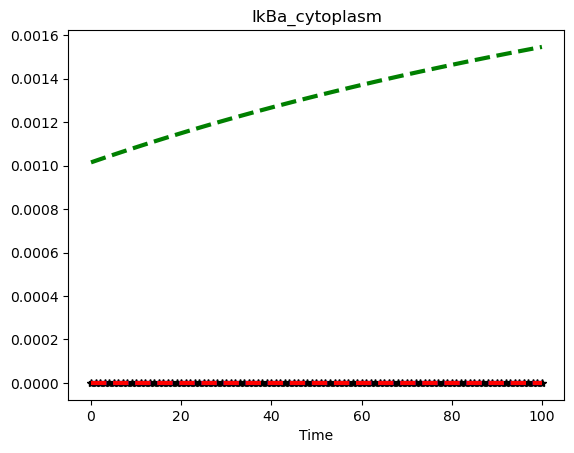

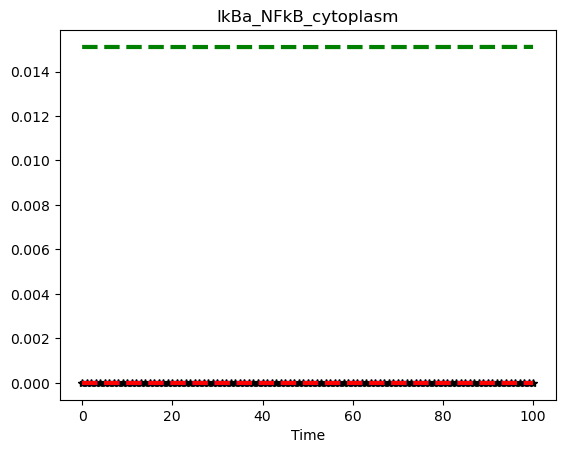

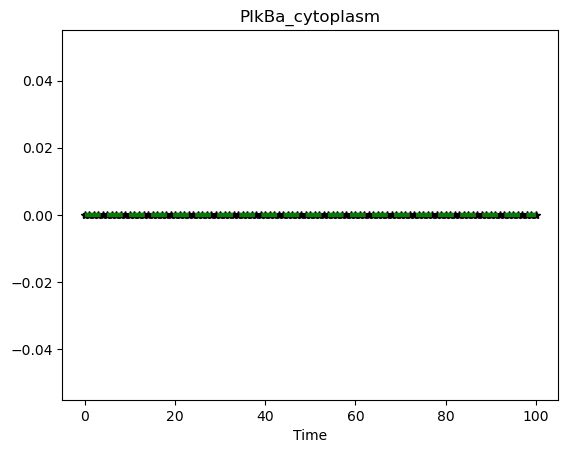

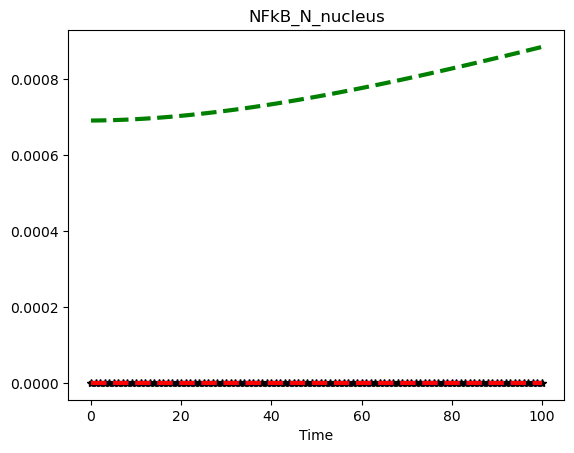

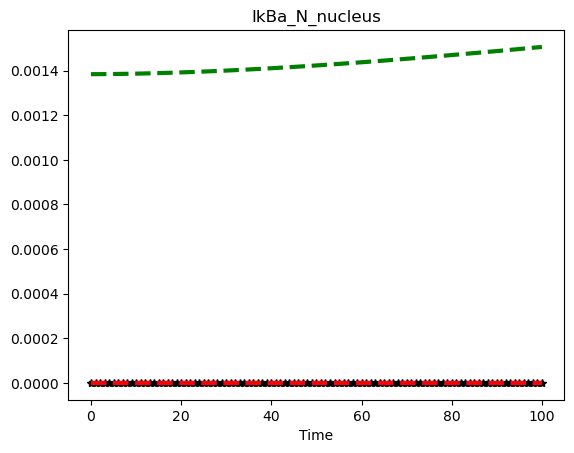

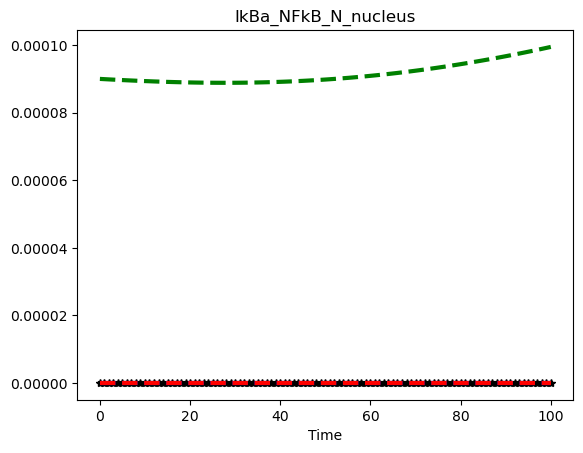

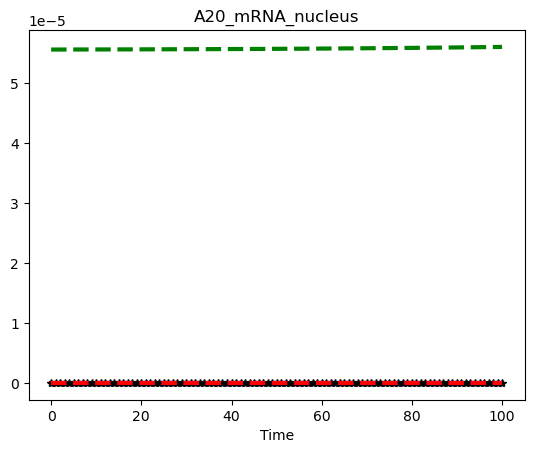

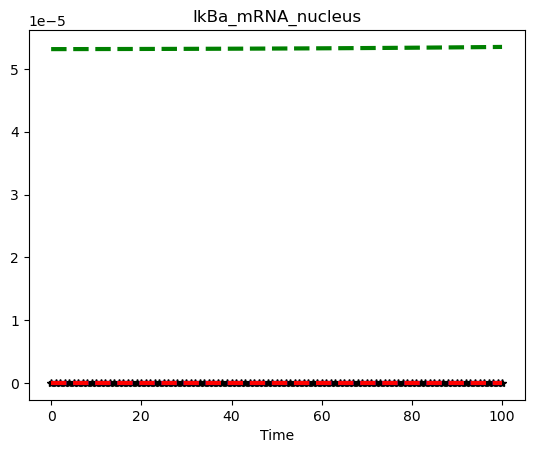

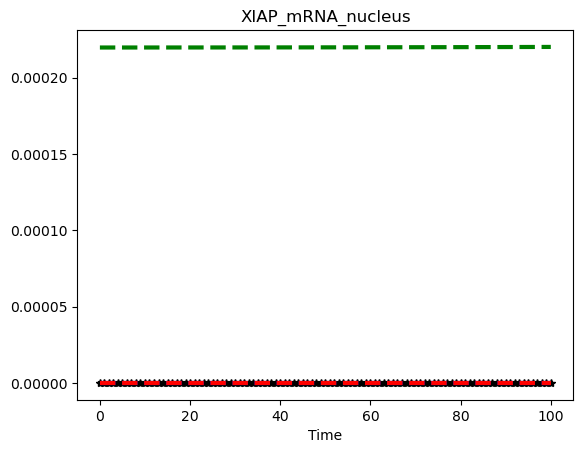

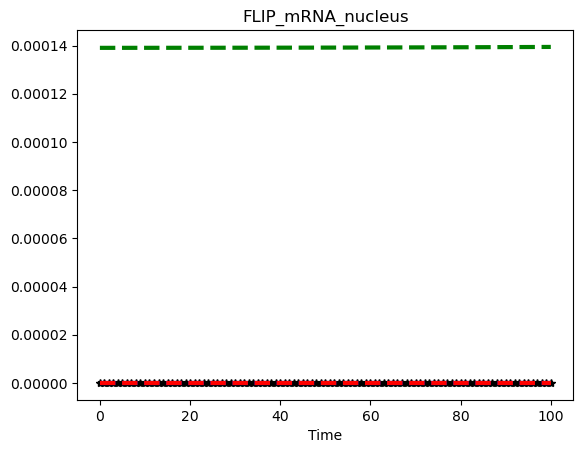

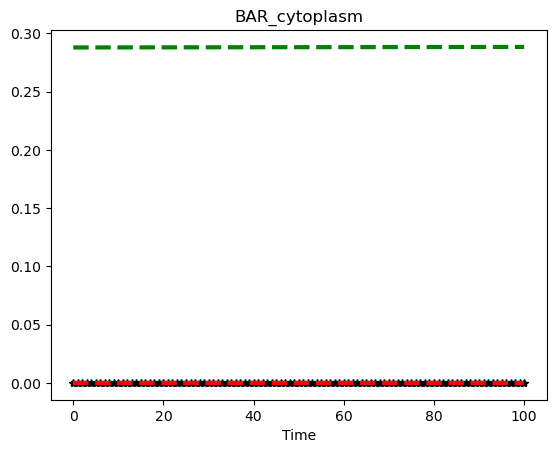

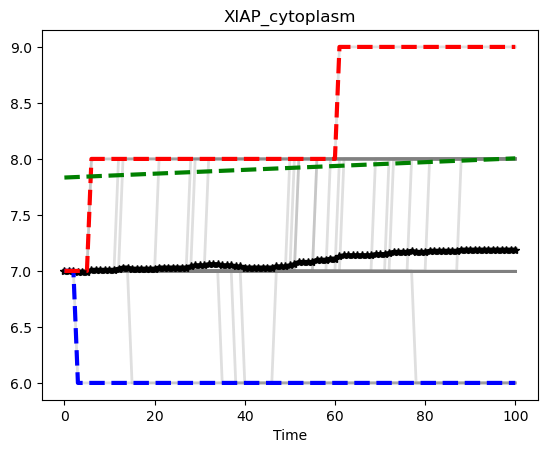

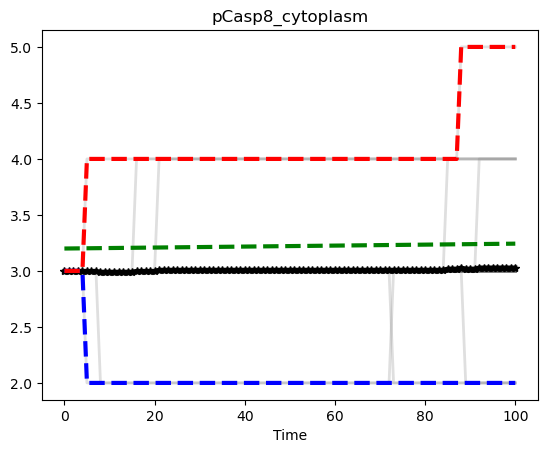

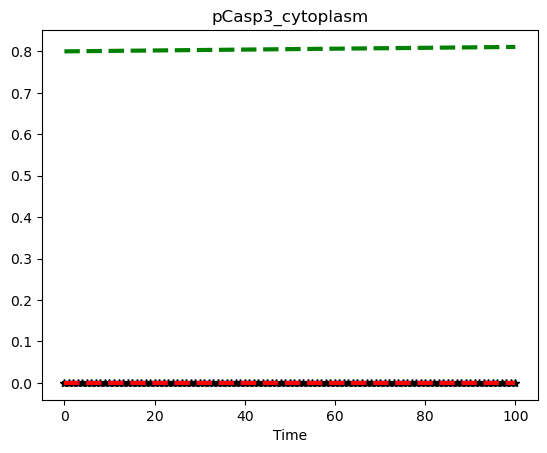

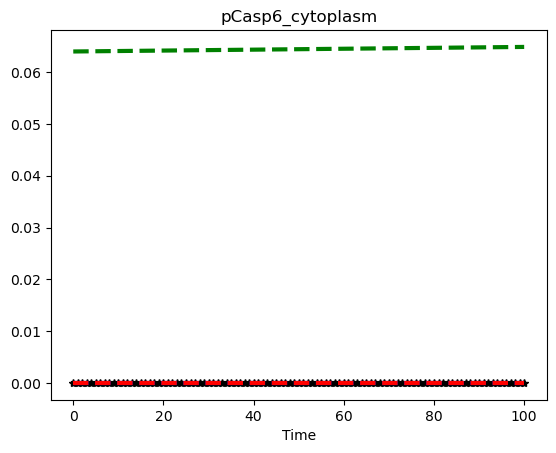

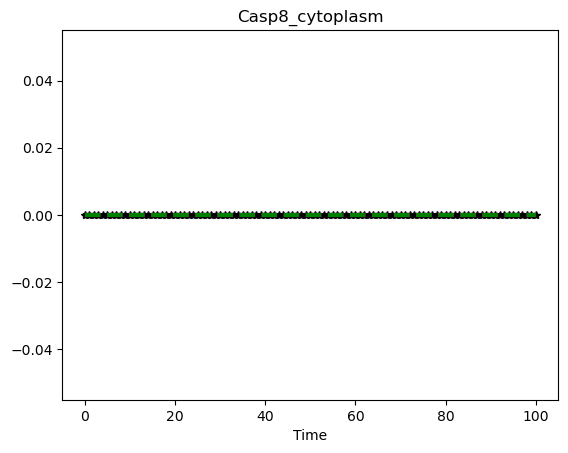

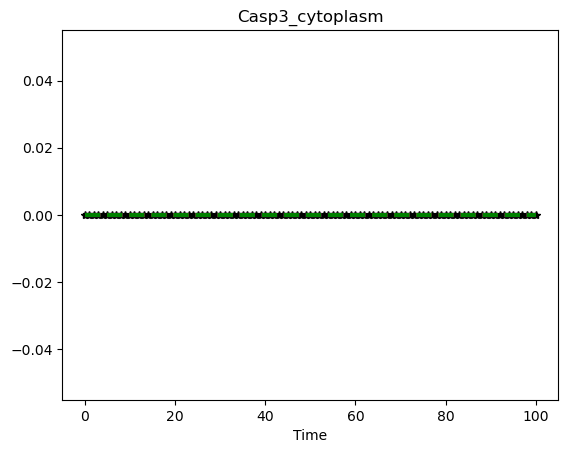

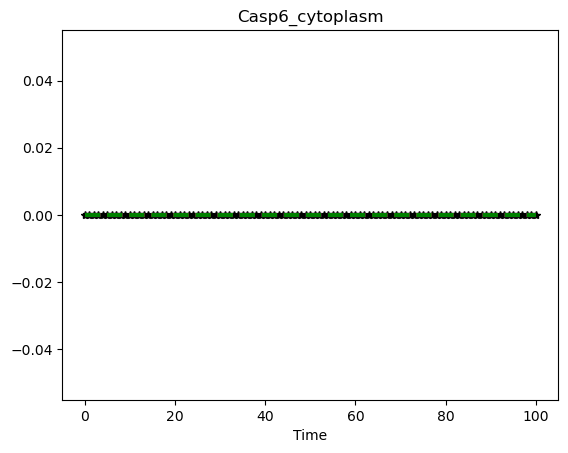

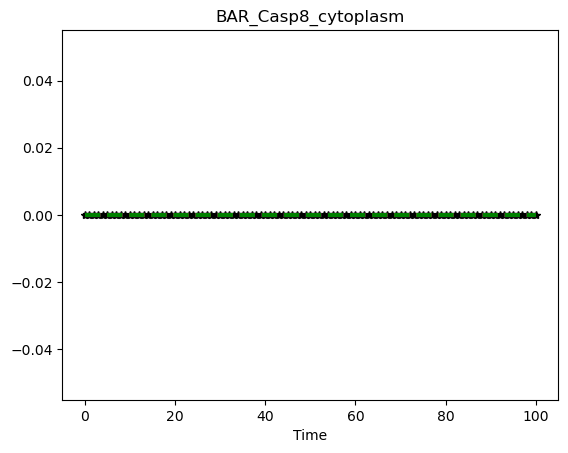

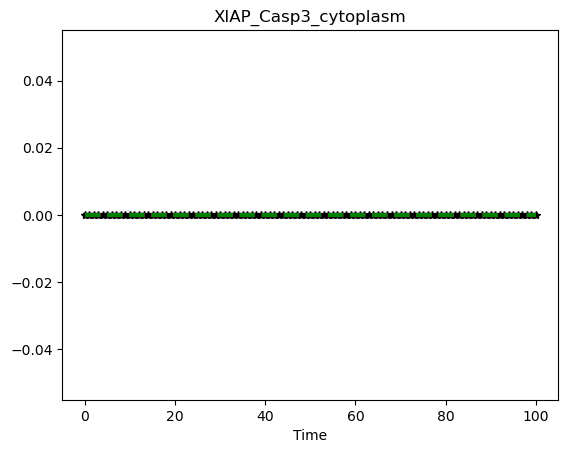

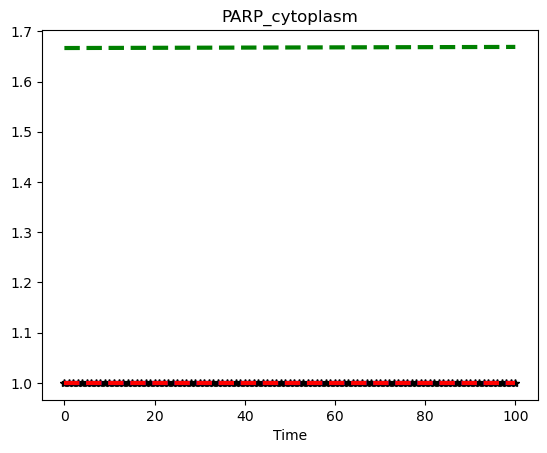

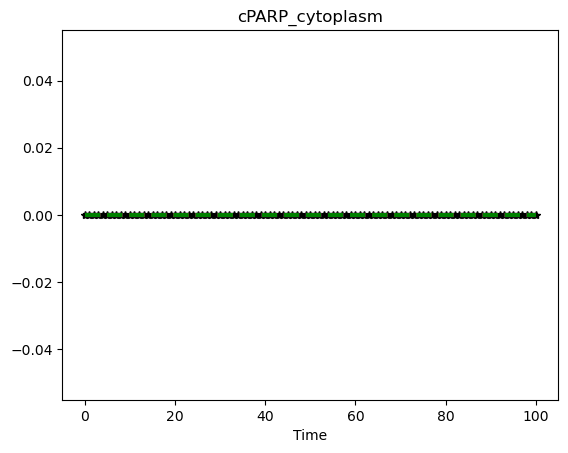

In [4]:
run_sbml('BIOMD0000000407_url.xml', tspan=np.linspace(0, 100, 101))
